In [3]:
import matplotlib.pyplot as plt
import h5py
import os

In [4]:
class MyDataset:
    def __init__(self, h5_file):
        # open H5 database, get data pairs and quality difference
        self.f = h5py.File(h5_file, 'r')
        self.seg1 = self.f['seg1']
        self.seg2 = self.f['seg2']
        self.diff = self.f['diff']

        # load order index
        self.sorted_indices = self.f['sorted_indices'][:]

    def __len__(self):
        return len(self.sorted_indices)

    def __getitem__(self, idx):
        # Accroading to order index to get pairs.
        # In pretraing stage, label is non-used, only get sample1 and sample2
        sorted_idx = self.sorted_indices[idx]
        sample1 = self.seg1[sorted_idx]
        sample2 = self.seg2[sorted_idx]
        label = self.diff[sorted_idx]
        return (sample1, sample2), label

    def close(self):
        self.f.close()

Total numbers of pairs: 765


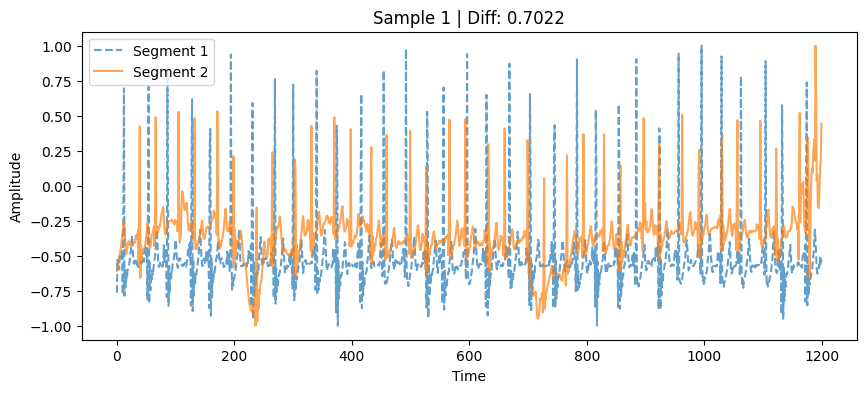

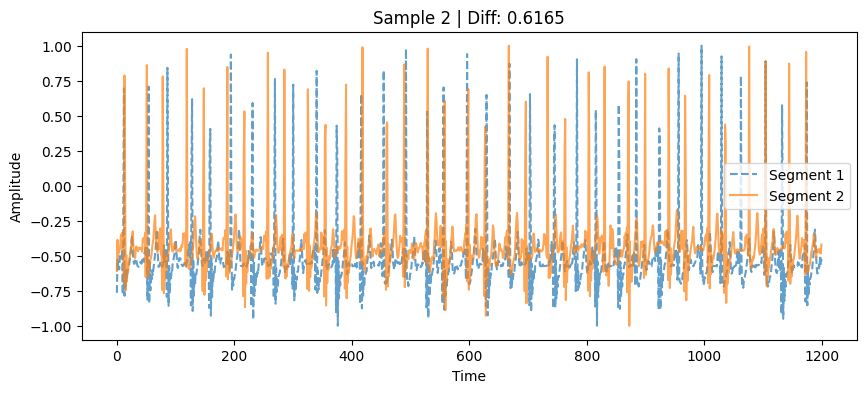

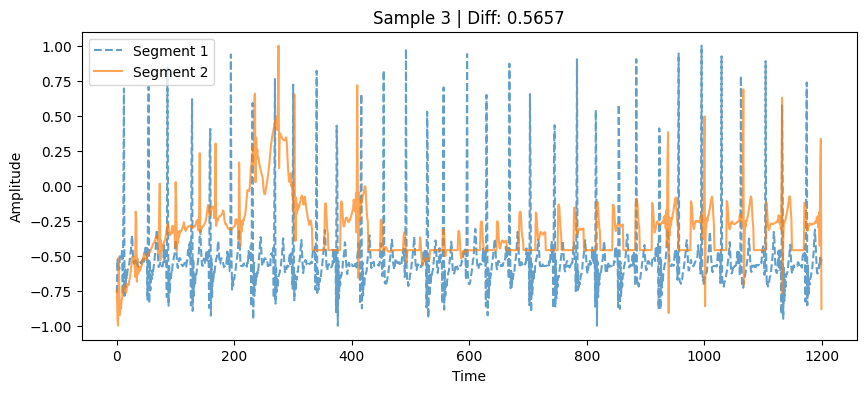

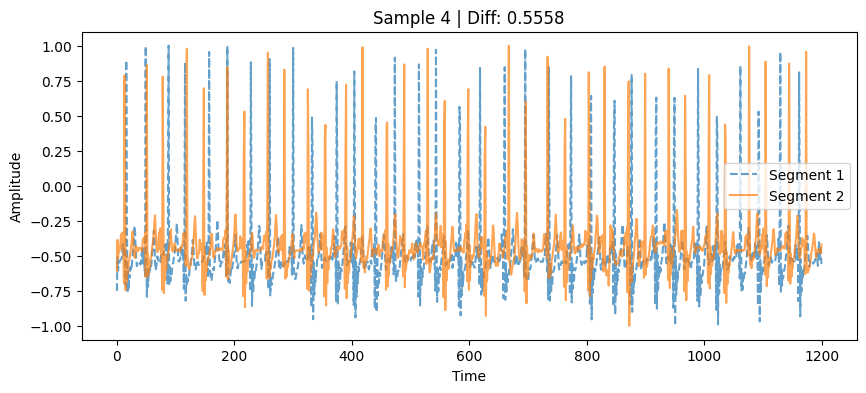

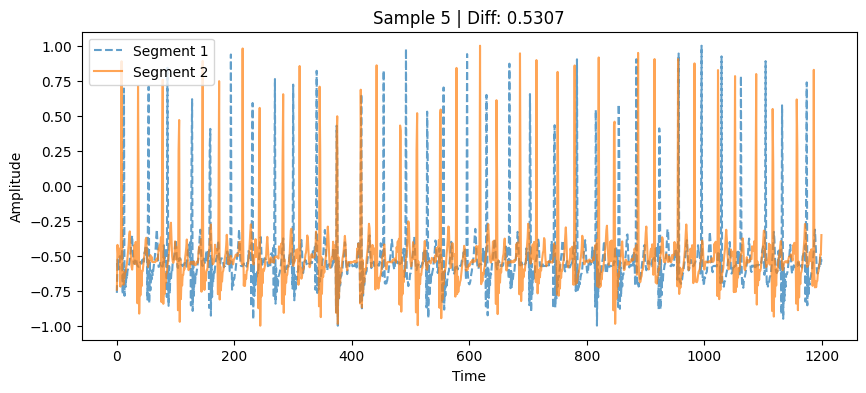

In [5]:
# Demo
if __name__ == '__main__':
    save_path = r"D:\code_zongheng\foundation_model\saved_data\pair_segments"
    h5_file = os.path.join(save_path, 'datasets.h5')
    dataset = MyDataset(h5_file)
    print("Total numbers of pairs:", len(dataset))

    # for i in range(len(dataset)):
    #     (s1, s2), diff_value = dataset[i]
    #     print(f"Sample {i}: diff = {diff_value}, seg1 shape = {s1.shape}, seg2 shape = {s2.shape}")

    dataset = MyDataset(h5_file)
    for i in range(5):
        (seg1, seg2), diff = dataset[len(dataset) - 1 - i]
        seg1 = seg1
        seg2 = seg2

        # 画图
        plt.figure(figsize=(10, 4))

        plt.plot(seg1, label="Segment 1", linestyle='dashed', alpha=0.7)
        plt.plot(seg2, label="Segment 2", alpha=0.7)

        plt.title(f"Sample {i + 1} | Diff: {diff:.4f}")
        plt.xlabel("Time")
        plt.ylabel("Amplitude")
        plt.legend()

        plt.show()
    dataset.close()